In [6]:
import numpy as np
import pandas as pd
import matplotlib as plot
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df=pd.read_csv("clean_df.csv")
df

,Unnamed: 0,Title,Platforms,Publisher,Genre,Total_sales,USA_Sales,EUR_Sales,Japan_Sales,Release_date,Year
0,0,Grand Theft Auto: San Andreas,PS2,Rockstar Games,Action,21.0,10.0,1.0,1.0,26 Oct 04,2004.0
1,1,Grand Theft Auto V,PS4,Rockstar Games,Action,20.0,7.0,10.0,1.0,18 Nov 14,2014.0
2,2,Grand Theft Auto V,X360,Rockstar Games,Action,16.0,10.0,6.0,1.0,17 Sep 13,2013.0
3,3,Grand Theft Auto IV Read the review,X360,Rockstar Games,Action,12.0,7.0,4.0,1.0,29 Apr 08,2008.0
4,4,Uncharted 4: A Thief's End,PS4,Sony Interactive Entertainment,Action,11.0,5.0,4.0,1.0,10 May 16,2016.0
...,...,...,...,...,...,...,...,...,...,...,...
4396,63843,Tokyo Twilight Ghost Hunters,PS3,Aksys Games,Visual+Novel,1.0,1.0,0.0,1.0,10 Mar 15,2015.0
4397,63844,Steins;Gate,PS3,5pb,Visual+Novel,1.0,1.0,1.0,1.0,18 Sep 15,2015.0
4398,63936,Tears to Tiara II: Heir of the Overlord,PS3,NIS America,Visual+Novel,1.0,1.0,1.0,1.0,14 Oct 14,2014.0
4399,63943,Tokyo Twilight Ghost Hunters,PS3,Aksys Games,Visual+Novel,1.0,1.0,0.0,1.0,10 Mar 15,2015.0


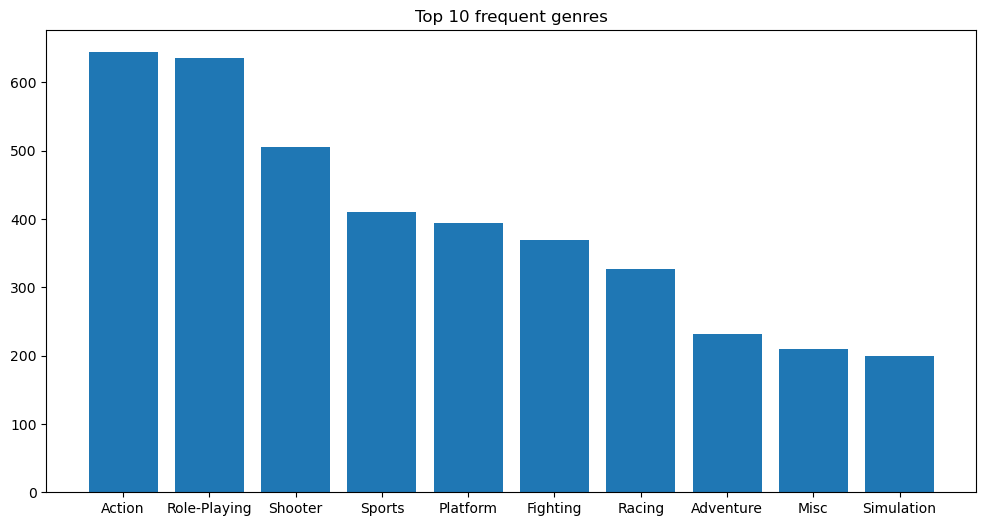

In [98]:
counts = df['Genre'].value_counts()

fig, ax = plt.subplots(figsize=(12,6))
top_10 = counts[:10] # here we get the most frequent genres in the data set
top_Generes=list(top_10.keys())
plt.bar(range(10), top_10.values, align='center', tick_label=top_Generes);
plt.title("Top 10 frequent genres");

In [101]:
top_games = games_2008.pivot_table(index='Genre',columns='Year'
                        ,values='Total_sales',aggfunc='sum').copy()

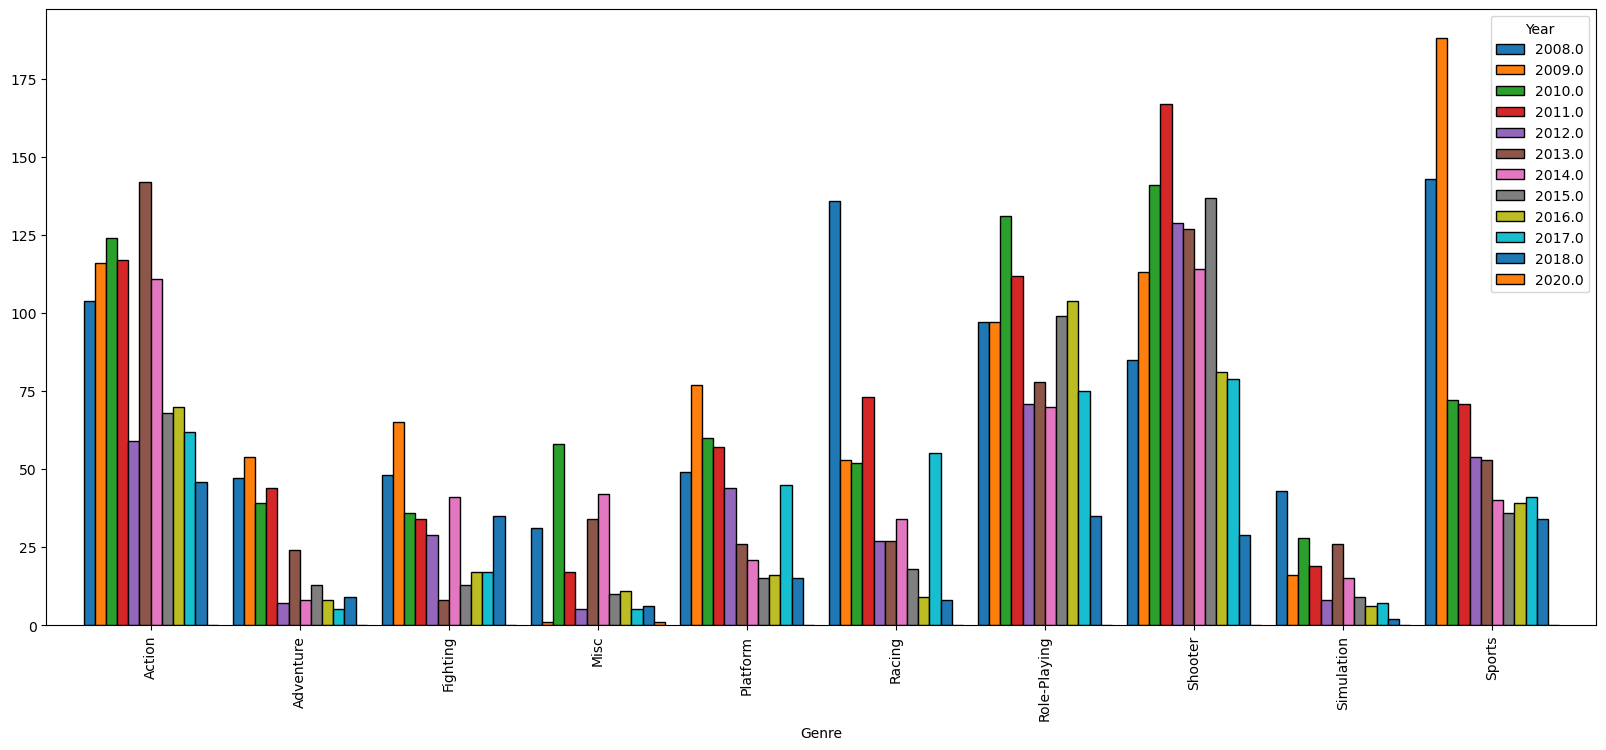

In [116]:
top_games.query('Genre in @top_Generes').plot(kind='bar', figsize=(20,8), edgecolor='black',width=0.9)
plt.title('')
plt.show()

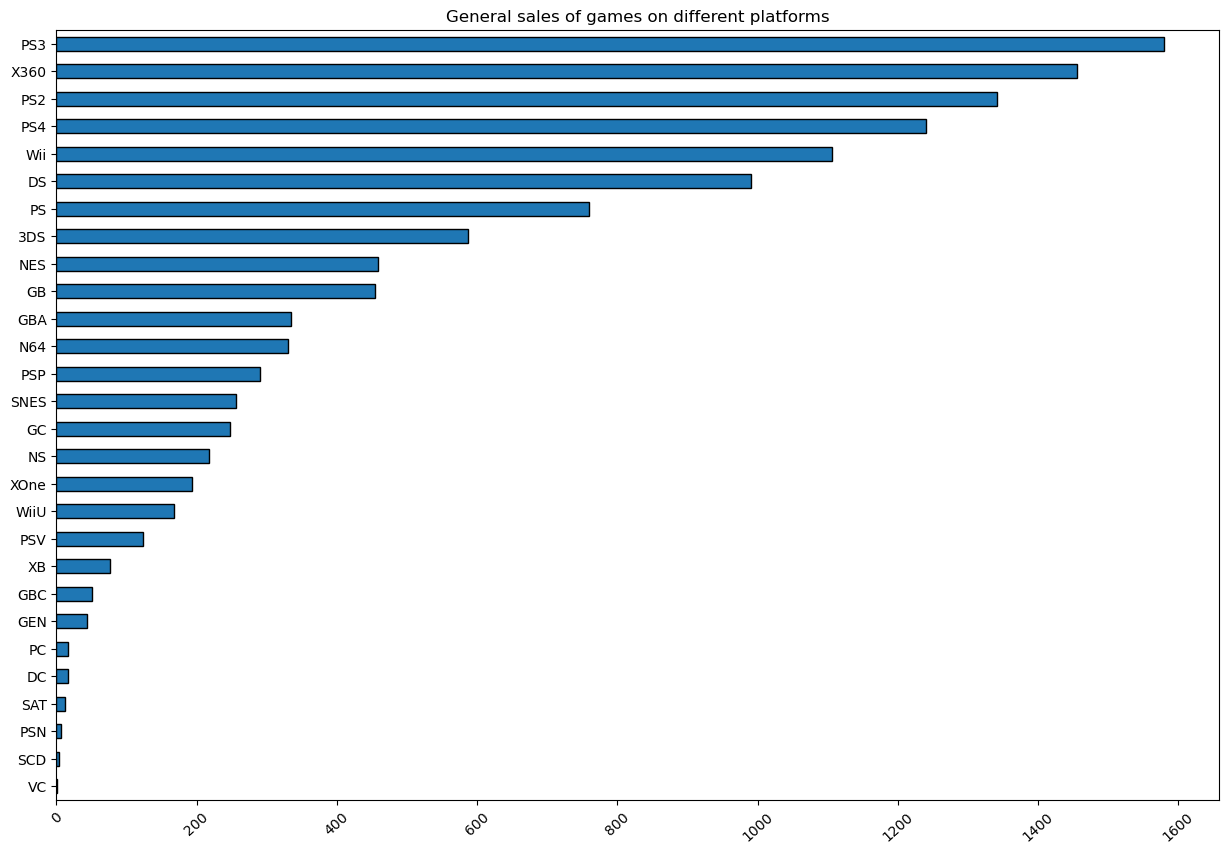

In [89]:
df.groupby('Platforms')['Total_sales'].sum().sort_values(ascending=True).plot(
 kind='barh', y='Total_sales', figsize=(15,10), edgecolor='black')#here we show the general sales of games in diffrent platforms
plt.title('General sales of games on different platforms')
plt.xticks(rotation=42)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [68]:
games_2008 = df.query('Year>=2008').reset_index(drop=True)

In [71]:
lead_platforms = ['PS4','X360', 'DS','PS2','PS3','Wii']
lead_games = games_2008.query('Platforms in @lead_platforms')

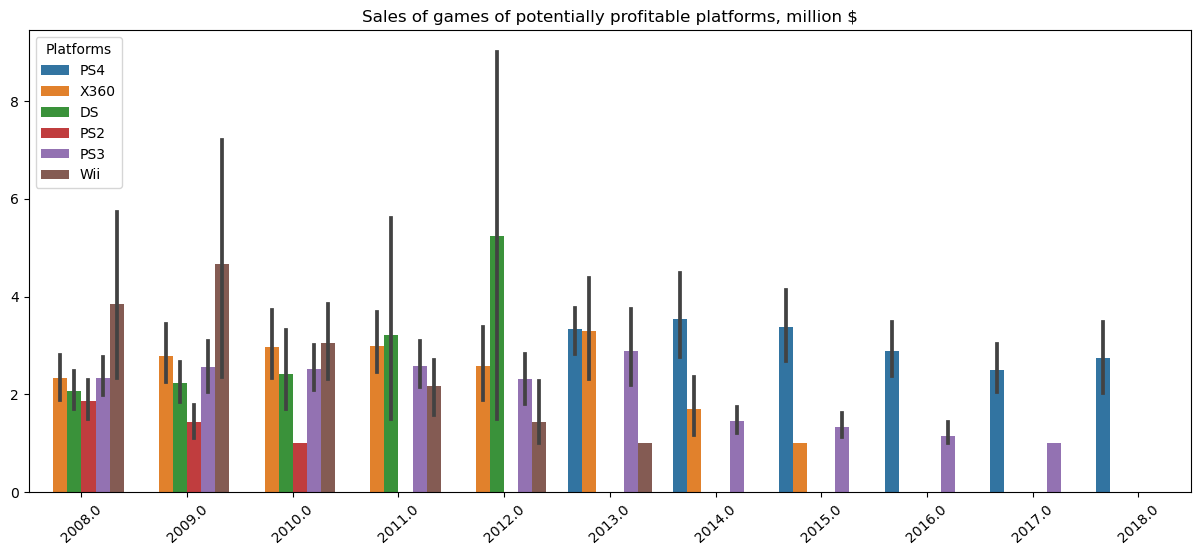

In [72]:
plt.figure(figsize=(15, 6))
sns.barplot(y='Total_sales', 
            x='Year', 
            hue='Platforms',
            data=lead_games,
            hue_order = lead_platforms
           )

plt.title('Sales of games of potentially profitable platforms, million $')
plt.xticks(rotation=42)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [74]:
AllGames = df.query('Year>=1985').reset_index(drop=True)

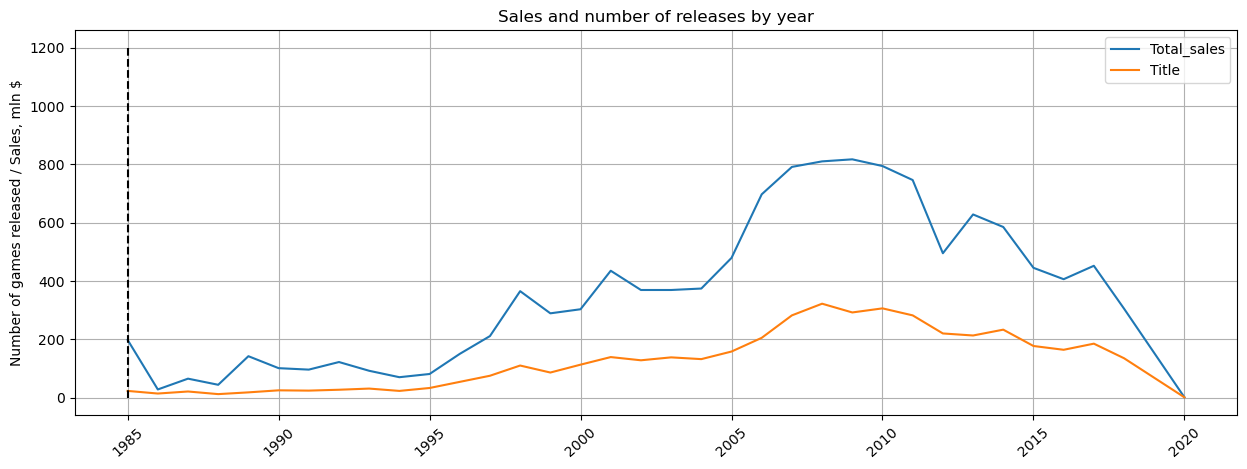

In [78]:
plt.figure(figsize=(15, 5))
ax = plt.gca()
AllGames.groupby('Year')['Total_sales'].sum().plot(legend=True, title='Sales and number of releases by year')
                                                                
AllGames.groupby('Year')['Title'].count().plot(legend=True, grid=True)

plt.ylabel('Number of games released / Sales, mln $')
ax.vlines(x=1985, linestyle='--', color='black', ymin=0, ymax=1200)
plt.xticks(rotation=42)
plt.xlabel('')
plt.show()

In [118]:
def heatmap_plot(data):

    plt.figure(figsize=(15,5))
    plt.title('Heatmap Correlation and Impact Distribution of all sales')
    sns.heatmap(data[['Total_sales', 'USA_Sales', 'EUR_Sales','Japan_Sales']].corr(), annot=True, cmap='mako', fmt='.3f' )# here we get the Correlation between sales in diffrent regions
    plt.show()

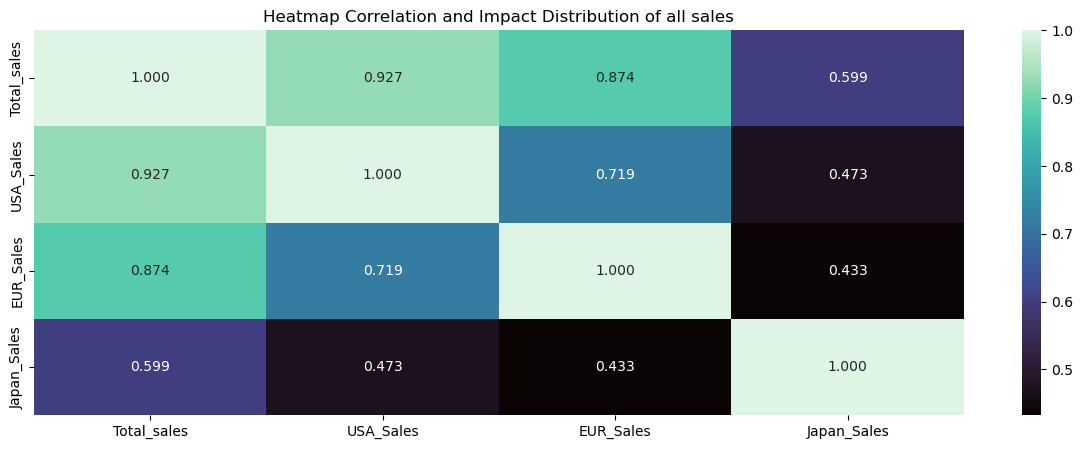

In [119]:
heatmap_plot(df)